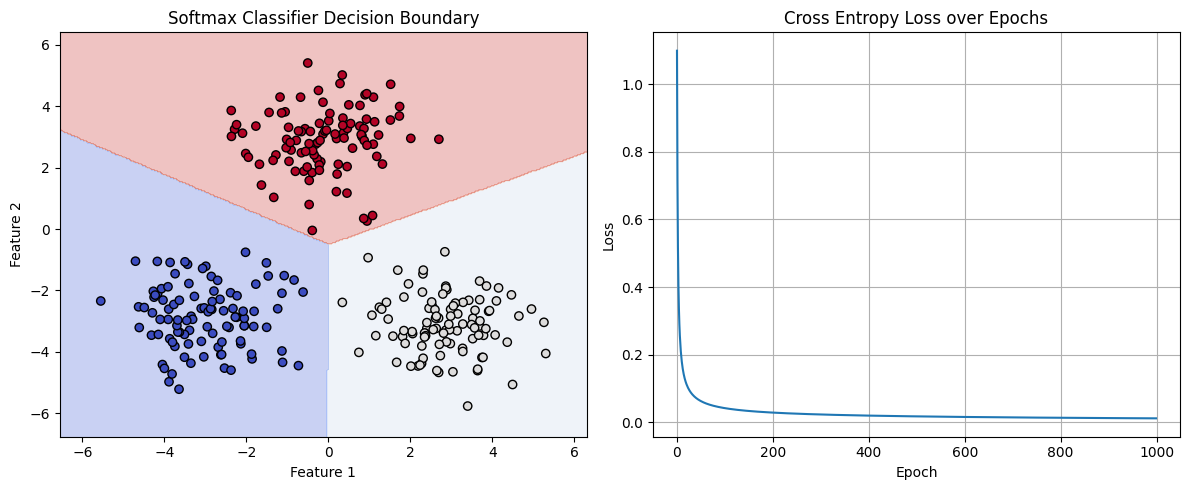

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 1. Generate synthetic 2D data for 3 classes ====
np.random.seed(0)
n_class = 100
X1 = np.random.randn(n_class, 2) + np.array([-3, -3])
X2 = np.random.randn(n_class, 2) + np.array([3, -3])
X3 = np.random.randn(n_class, 2) + np.array([0, 3])
X = np.vstack([X1, X2, X3])  # shape: (300, 2)

# Labels: 0, 1, 2 → one-hot encoding
y_int = np.array([0]*n_class + [1]*n_class + [2]*n_class)
y = np.zeros((y_int.size, 3))
y[np.arange(y_int.size), y_int] = 1  # shape: (300, 3)

# ==== 2. Initialize weights ====
n_samples, n_features = X.shape
n_classes = 3
X_aug = np.hstack([X, np.ones((n_samples, 1))])  # Add bias
W = np.zeros((n_features + 1, n_classes))  # shape: (3, 3)

# ==== 3. Define softmax and loss ====
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # for numerical stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

# ==== 4. Train with gradient descent ====
lr = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    logits = X_aug @ W
    probs = softmax(logits)
    loss = cross_entropy(y, probs)
    losses.append(loss)

    # Gradient
    grad = X_aug.T @ (probs - y) / n_samples
    W -= lr * grad

# ==== 5. Predict and plot ====
def predict(X_input):
    X_input_aug = np.hstack([X_input, np.ones((X_input.shape[0], 1))])
    return np.argmax(softmax(X_input_aug @ W), axis=1)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 5))

# Decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y_int, cmap='coolwarm', edgecolor='k')
plt.title("Softmax Classifier Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Cross Entropy Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()
